In [ ]:
%matplotlib inline

!pip install tensorflow
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import random
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.metrics import mean_squared_error

You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
full_data = pd.read_csv('data/merged_data.csv')

full_data

/opt/venv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (30) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,#JCAT,Satcat,Piece,Type,Name,LDate,SDate,Primary,DDate,...,AF,Inc,IF,OpOrbit,LYear,DYear,OBJECT_ID,NORAD_CAT_ID,COUNTRY,RCS_SIZE
0,0,S00001,1,1957 ALP 1,R2,8K71A M1-10,1957 Oct 4,1957 Oct 4 1933,Earth,1957 Dec 1 1000?,...,,65.10,,LLEO/I,1957,1957,1957-001A,1,CIS,LARGE
1,1,S00002,2,1957 ALP 2,P,1-y ISZ,1957 Oct 4,1957 Oct 4 1933,Earth,1958 Jan 4?,...,,65.10,,LLEO/I,1957,1958,1957-001B,2,CIS,NaN
2,2,S00003,3,1957 BET 1,P A,2-y ISZ,1957 Nov 3,1957 Nov 3 0235,Earth,1958 Apr 14 0200?,...,,65.33,,LEO/I,1957,1958,1957-002A,3,CIS,SMALL
3,3,S00004,4,1958 ALP,P A,Explorer 1,1958 Feb 1,1958 Feb 1 0355,Earth,1970 Mar 31 1045?,...,,33.18,,LEO/I,1958,1970,1958-001A,4,US,NaN
4,4,S00005,5,1958 BET 2,P,Vanguard I,1958 Mar 17,1958 Mar 17 1224,Earth,2100,...,,34.25,,MEO,1958,2100,1958-002B,5,US,MEDIUM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46520,46520,S46607,46607,2018-079CF,D P,deb Centaur AV-073,2018 Oct 17,2019 Apr 6,Earth,2100,...,,11.50,,MEO,2018,2100,2018-079CF,46607,US,NaN
46521,46521,S46608,46608,2018-079CG,D P,deb Centaur AV-073,2018 Oct 17,2019 Apr 6,Earth,2100,...,,11.37,,MEO,2018,2100,2018-079CG,46608,US,NaN
46522,46522,S46609,46609,2020-061BH,P,Flock 4v-19,2020 Sep 3,2020 Oct 9?,Earth,2100,...,,97.45,,LLEO/S,2020,2100,2020-061BH,46609,US,NaN
46523,46523,S46610,46610,2020-071A,P,Gao Fen 13,2020 Oct 11,2020 Oct 11 1707,Earth,2100,...,,1.98,,GEO/S,2020,2100,2020-071A,46610,PRC,NaN


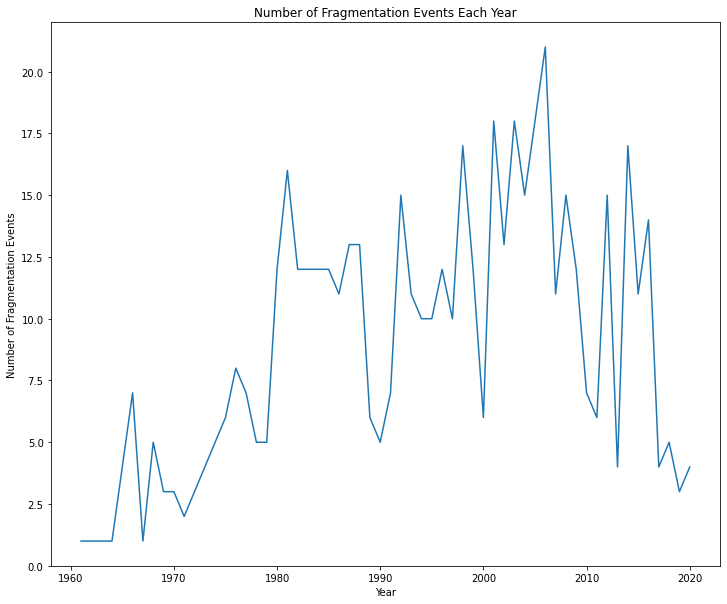

In [ ]:
 # EDA 

frag = pd.read_csv('data/frag_full.csv')
frag['EYear'] = frag['Event Date'].str[-4:].astype(int)

num_events = frag.groupby('EYear').count()

years = np.array(num_events.index)
num = np.array(num_events['Name_x'])
sum_cat = np.array(frag.groupby('EYear').sum()['Catalogued Objects'])
sum_1cm = np.array(frag.groupby('EYear').sum()['Objects > 1 cm'])
sum_10cm = np.array(frag.groupby('EYear').sum()['Objects > 10 cm'])
sum_orbit = np.array(frag.groupby('EYear').sum()['Objects on Orbit'])



fig, ax = plt.subplots(figsize = (12,10))
plt.plot(years, num)
plt.title("Number of Fragmentation Events Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Fragmentation Events")

# plt.savefig('fragmentations_over_time.png')



tot_orbit = []
c = 0
for i in range(len(years)):
    c+=sum_orbit[i]
    tot_orbit.append(c)


In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (20,10))
ax[0][0].plot(years, sum_cat)
ax[0][0].set_title("Number of Catalogued Objects Produced in Fragmentation Events")
ax[0][0].set_xlabel("Year")
ax[0][0].set_ylabel("Number of Catalogued Object Produced")
ax[0][1].plot(years, tot_orbit)
ax[0][1].set_title("Number of Catalogued Objects in Orbit from Fragmentation Events")
ax[0][1].set_xlabel("Year")
ax[0][1].set_ylabel("Number of Objects")
ax[1][0].plot(years, sum_1cm)
ax[1][0].set_title("Number of Catalogued Objects >1cm Produced in Fragmentation Events")
ax[1][0].set_xlabel("Year")
ax[1][0].set_ylabel("Number of Catalogued Object Produced")
ax[1][1].plot(years, sum_10cm)
ax[1][1].set_title("Number of Catalogued Objects >10cm Produced in Fragmentation Events")
ax[1][1].set_xlabel("Year")
ax[1][1].set_ylabel("Number of Catalogued Object Produced")

plt.savefig('num_objects.png')

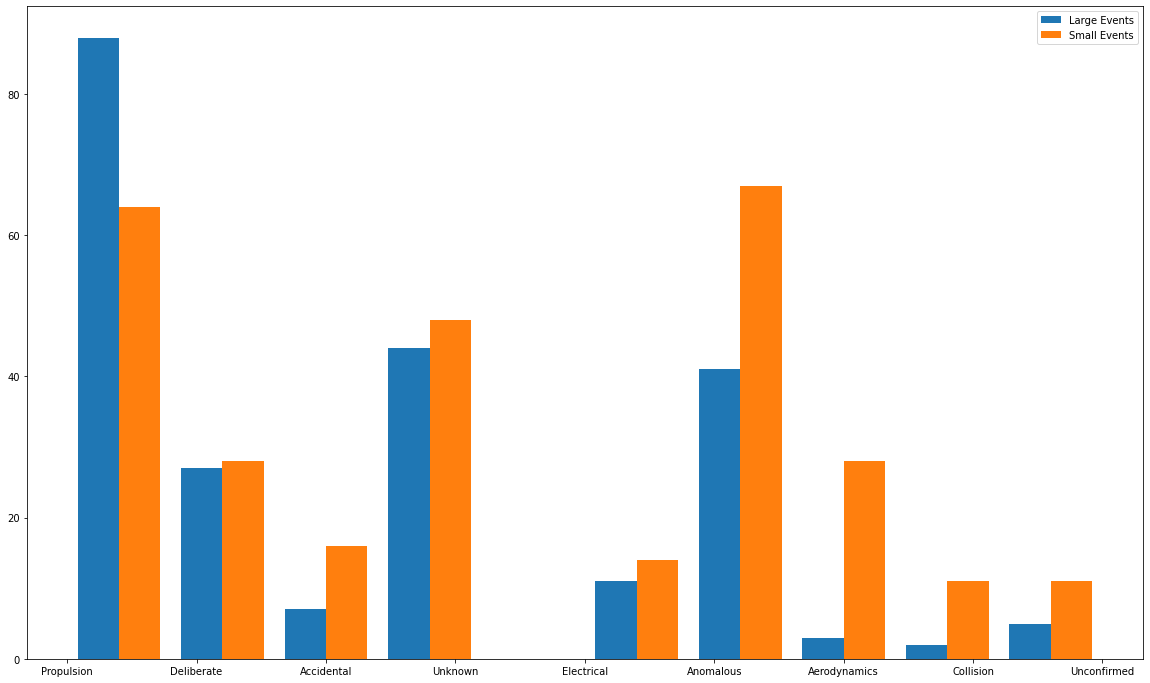

In [ ]:
###### I THINK WE MAY HAVE TO DO SOME DATA CLEANING BEFORE USING THE SET
###### (REMOVE OUTLIERS, ETC), LIKE WE DID WHEN WE DID EDA WITH THE OTHER DATASET BEFORE 


large_events = frag[frag['Catalogued Objects'] > 10]
small_events = frag[frag['Catalogued Objects'] < 10]

fig, ax = plt.subplots(1,1,figsize=(20,12))
ax.hist([large_events['Event Type'], small_events['Event Type']], label = ['Large Events', 'Small Events'])
ax.legend()


In [ ]:
# by country
frag

russia = []
china = []
us = []
other = []

for year in years:
    russia.append(np.sum(frag[(frag["COUNTRY"]=="CIS") & (frag['EYear'] <= year)]['Catalogued Objects']))
    china.append(np.sum(frag[(frag["COUNTRY"]=="PRC") & (frag['EYear'] <= year)]['Catalogued Objects']))
    us.append(np.sum(frag[(frag["COUNTRY"]=="US") & (frag['EYear'] <= year)]['Catalogued Objects']))
    other.append(np.sum(frag[(frag["COUNTRY"]!="US") & (frag["COUNTRY"]!="CIS") & (frag["COUNTRY"]!="PRC") & (frag['EYear'] <= year)]['Catalogued Objects']))


Text(0, 0.5, 'Total Objects Produced')

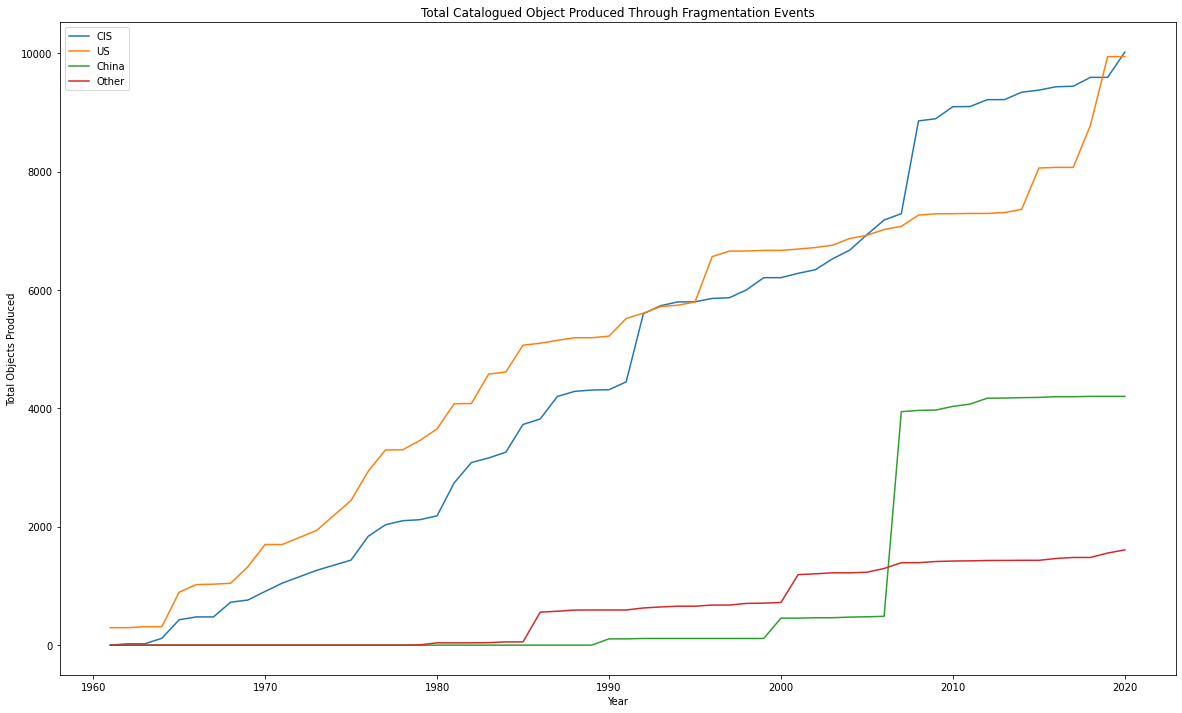

In [ ]:
fig, ax = plt.subplots(1,1,figsize=(20,12))
ax.plot(years, russia, label = 'CIS')
ax.plot(years, us, label = 'US')
ax.plot(years, china, label = 'China')
ax.plot(years, other, label = 'Other')
ax.legend()
ax.set_title('Total Catalogued Object Produced Through Fragmentation Events')
ax.set_xlabel('Year')
ax.set_ylabel('Total Objects Produced')

In [ ]:
full_data_predict = pd.get_dummies(full_data_predict, columns=['COUNTRY', 'OpOrbit', 'RCS_SIZE', 'Status', 'coarse_type'], drop_first=True)

full_data_predict

,PERIOD,INCLINATION,APOGEE,PERIGEE,Mass,DryMass,TotMass,Length,Diameter,Span,...,Status_O,Status_OX,Status_R,Status_R?,Status_REL,Status_TFR,coarse_type_D,coarse_type_P,coarse_type_R,coarse_type_Z
0,603.53,28.50,34413.0,145.0,8400.0,2800.0,2800.0,12.4,3.0,12.4,...,1,0,0,0,0,0,0,0,1,0
1,631.71,28.53,35836.0,183.0,4600.0,2500.0,4600.0,5.0,2.5,30.0,...,1,0,0,0,0,0,0,1,0,0
2,95.00,97.46,522.0,515.0,5.7,5.7,5.7,0.3,0.1,0.3,...,1,0,0,0,0,0,0,1,0,0
3,803.02,11.37,35576.0,8905.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
4,701.90,11.50,31667.0,7902.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46541,103.60,33.50,1739.0,117.0,8.0,8.0,14.0,0.8,0.1,0.8,...,0,0,0,0,0,0,0,1,0,0
46542,88.48,33.15,215.0,183.0,8.0,8.0,14.0,0.8,0.1,0.8,...,0,0,0,0,0,0,0,1,0,0
46543,103.74,65.33,1659.0,211.0,508.0,508.0,8308.0,2.0,1.0,2.0,...,0,0,0,0,0,0,0,1,0,0
46544,96.10,65.00,1080.0,64.0,84.0,84.0,84.0,0.6,0.6,2.9,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
train, test = train_test_split(full_data_predict, train_size=0.8, random_state=111)

X_train = train.drop('COUNTRY_PRC', axis = 1)
y_train = train['COUNTRY_PRC']
X_test = test.drop('COUNTRY_PRC', axis = 1)
y_test = test['COUNTRY_PRC']



X_train.shape

NameError: name 'full_data_predict' is not defined

In [ ]:
model_overfit = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape = (164,)),
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(100,activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
    
])

In [ ]:
model_overfit.compile(optimizer = 'adam', loss = "binary_crossentropy", metrics = ['accuracy'])

trained_model = model_overfit.fit(
    x = np.array(X_train), y = np.array(y_train), 
    epochs=10, batch_size=128, 
    validation_split = 0.3, 
    verbose = False
)


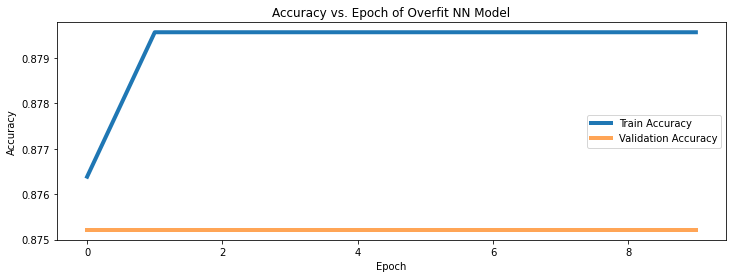

In [ ]:
plt.figure(figsize=[12,4])
plt.plot(trained_model.history['accuracy'], label = 'Train Accuracy', linewidth=4)
plt.plot(trained_model.history['val_accuracy'], label = 'Validation Accuracy', linewidth=4, alpha=.7)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy vs. Epoch of Overfit NN Model")
plt.legend()


In [ ]:
train_accuracy = model_overfit.evaluate(np.array(X_train),np.array(y_train), verbose = False)[1]
test_accuracy = model_overfit.evaluate(np.array(X_test),np.array(y_test), verbose = False)[1]

print("Train Accuracy: {:0.4f}".format(train_accuracy))
print("Test Accuracy: {:0.4f}".format(test_accuracy))

Train Accuracy: 0.8783
Test Accuracy: 0.8811


In [ ]:
full_data

,Unnamed: 0,OBJECT_ID,OBJECT_NAME,NORAD_CAT_ID,COUNTRY,PERIOD,INCLINATION,APOGEE,PERIGEE,RCS_SIZE,...,Perigee,PF,Apogee,AF,Inc,IF,OpOrbit,OQUAL,AltNames,coarse_type
0,0,2020-071B,OBJECT B,46611,PRC,603.53,28.50,34413.0,145.0,NaN,...,139,,34249,,28.46,,GTO,-,-,R
1,1,2020-071A,OBJECT A,46610,PRC,631.71,28.53,35836.0,183.0,NaN,...,35775,,35799,,1.98,,GEO/S,-,-,P
2,2,2020-061BH,FLOCK 4V 19,46609,US,95.00,97.46,522.0,515.0,NaN,...,513,,523,,97.45,,LLEO/S,-,-,P
3,3,2018-079CG,ATLAS 5 CENTAUR DEB,46608,US,803.02,11.37,35576.0,8905.0,NaN,...,8901,,35578,,11.37,,MEO,-,-,D
4,4,2018-079CF,ATLAS 5 CENTAUR DEB,46607,US,701.90,11.50,31667.0,7902.0,NaN,...,7902,,31666,,11.5,,MEO,-,-,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46541,46541,1958-003A,EXPLORER 3,6,US,103.60,33.50,1739.0,117.0,NaN,...,195,,2810,,33.38,,LEO/I,-,-,P
46542,46542,1958-001A,EXPLORER 1,4,US,88.48,33.15,215.0,183.0,NaN,...,359,,2542,,33.18,,LEO/I,-,-,P
46543,46543,1957-002A,SPUTNIK 2,3,CIS,103.74,65.33,1659.0,211.0,SMALL,...,211,,1659,,65.33,,LEO/I,-,-,P
46544,46544,1957-001B,SPUTNIK 1,2,CIS,96.10,65.00,1080.0,64.0,NaN,...,214,,938,,65.10,,LLEO/I,-,-,P


In [ ]:
fragmentations = pd.read_csv('data/fragmentations.csv')

fragmentations

full_data

,Unnamed: 0,#JCAT,Satcat,Piece,Type,Name,LDate,SDate,Primary,DDate,...,AF,Inc,IF,OpOrbit,LYear,DYear,OBJECT_ID,NORAD_CAT_ID,COUNTRY,RCS_SIZE
0,0,S00001,1,1957 ALP 1,R2,8K71A M1-10,1957 Oct 4,1957 Oct 4 1933,Earth,1957 Dec 1 1000?,...,,65.10,,LLEO/I,1957,1957,1957-001A,1,CIS,LARGE
1,1,S00002,2,1957 ALP 2,P,1-y ISZ,1957 Oct 4,1957 Oct 4 1933,Earth,1958 Jan 4?,...,,65.10,,LLEO/I,1957,1958,1957-001B,2,CIS,NaN
2,2,S00003,3,1957 BET 1,P A,2-y ISZ,1957 Nov 3,1957 Nov 3 0235,Earth,1958 Apr 14 0200?,...,,65.33,,LEO/I,1957,1958,1957-002A,3,CIS,SMALL
3,3,S00004,4,1958 ALP,P A,Explorer 1,1958 Feb 1,1958 Feb 1 0355,Earth,1970 Mar 31 1045?,...,,33.18,,LEO/I,1958,1970,1958-001A,4,US,NaN
4,4,S00005,5,1958 BET 2,P,Vanguard I,1958 Mar 17,1958 Mar 17 1224,Earth,2100,...,,34.25,,MEO,1958,2100,1958-002B,5,US,MEDIUM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46520,46520,S46607,46607,2018-079CF,D P,deb Centaur AV-073,2018 Oct 17,2019 Apr 6,Earth,2100,...,,11.50,,MEO,2018,2100,2018-079CF,46607,US,NaN
46521,46521,S46608,46608,2018-079CG,D P,deb Centaur AV-073,2018 Oct 17,2019 Apr 6,Earth,2100,...,,11.37,,MEO,2018,2100,2018-079CG,46608,US,NaN
46522,46522,S46609,46609,2020-061BH,P,Flock 4v-19,2020 Sep 3,2020 Oct 9?,Earth,2100,...,,97.45,,LLEO/S,2020,2100,2020-061BH,46609,US,NaN
46523,46523,S46610,46610,2020-071A,P,Gao Fen 13,2020 Oct 11,2020 Oct 11 1707,Earth,2100,...,,1.98,,GEO/S,2020,2100,2020-071A,46610,PRC,NaN


In [ ]:
fragmentations_merged = fragmentations.merge(full_data, how = 'left', left_on = 'COSPAR ID', right_on = 'OBJECT_ID')

predictors_frag = ['COUNTRY', 'Mass', 'Length', 'Diameter', 'Span', 'Shape', 'OpOrbit', 'Event Type', 'Apogee', 'Perigee','Inc', 'Catalogued Objects']

frag_pred = fragmentations_merged[predictors_frag]
frag_pred['Catalogued Objects'] = frag_pred['Catalogued Objects'].fillna(0)
frag_pred['large_event'] = (frag_pred['Catalogued Objects'] > 10)*1.0
frag_pred['Shape'] = frag_pred['Shape'].fillna('unknown')
frag_pred = frag_pred.dropna(subset =['Apogee'])
# frag_pred.to_csv('frag_full.csv')
frag_pred = frag_pred.drop('Catalogued Objects', axis = 1)
frag_pred = pd.get_dummies(frag_pred, columns = ['COUNTRY', 'Shape', 'Event Type', 'OpOrbit'] )
frag_train, frag_test = train_test_split(frag_pred, train_size=0.8, random_state=111)
predictors_to_scale = ['Mass', 'Length', 'Diameter', 'Span', 'Apogee', 'Perigee' ]
scaler = StandardScaler().fit(frag_train[predictors_to_scale])
frag_train[predictors_to_scale] = scaler.transform(frag_train[predictors_to_scale])
frag_test[predictors_to_scale] = scaler.transform(frag_test[predictors_to_scale])

x_frag_train = frag_train.drop('large_event', axis = 1)
y_frag_train_2 = frag_train['large_event']
x_frag_test = frag_test.drop('large_event', axis = 1)
# y_frag_test = frag_test['Catalogued Objects']
y_frag_test_2 = frag_test['large_event']






# fragmentations_merged.info()

fragmentations_merged.groupby('Shape').count().sort_values(by = 'Name_x')

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

,Unnamed: 0_x,Unnamed: 0.1,Name_x,Event Date,Event Type,COSPAR ID,Catalogued Objects,Objects on Orbit,Objects > 1 cm,Objects > 10 cm,...,AF,Inc,IF,OpOrbit,LYear,DYear,OBJECT_ID,NORAD_CAT_ID,COUNTRY,RCS_SIZE
Shape,,,,,,,,,,,,,,,,,,,,,
5 Cyl + 2 Box,1,0,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
Cyl + Inf Sphere,1,0,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,0
Truss + Sphere + Cone,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Cyl + Sail,1,0,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
Cyl + Sphere + Cone + 2 Pan,1,0,1,1,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
DCone,1,0,1,1,1,1,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
Ell + Ant,1,0,1,1,1,1,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
Ell + Cone,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Frust,1,0,1,1,1,1,1,1,0,0,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
corrs = pd.DataFrame(frag_pred.corr())

corrs[corrs['large_event'] > 0.1]

,Mass,Length,Diameter,Span,Perigee,large_event,COUNTRY_CA,COUNTRY_CHBZ,COUNTRY_CIS,COUNTRY_ESA,...,OpOrbit_HEO/M,OpOrbit_LEO/E,OpOrbit_LEO/I,OpOrbit_LEO/P,OpOrbit_LEO/R,OpOrbit_LEO/S,OpOrbit_LLEO/I,OpOrbit_LLEO/S,OpOrbit_MEO,OpOrbit_VHEO
Length,0.486256,1.000000,0.645214,0.322244,-0.005900,0.180683,-0.060737,-0.036174,-0.218042,0.055924,...,-0.111322,-0.000584,-0.058560,-0.258962,0.229091,-0.047978,0.247958,0.047724,-0.029870,0.072699
large_event,-0.010225,0.180683,0.033248,-0.032002,0.011606,1.000000,-0.053616,0.050003,0.024426,-0.067380,...,-0.175070,-0.037876,0.113881,-0.128678,0.173536,-0.045798,0.078679,-0.052437,0.099403,-0.053616
Shape_Cone + Cyl,-0.042331,-0.034244,-0.024547,-0.078061,0.007009,0.182374,-0.009778,-0.006908,-0.113822,-0.018381,...,-0.047213,-0.006908,-0.071868,0.282280,-0.029790,-0.067983,-0.007645,-0.031463,0.164588,-0.009778
Shape_Cyl + 3 Pan,-0.038302,0.251348,-0.041821,0.070634,-0.027352,0.202916,-0.010880,-0.007686,-0.180999,-0.020451,...,-0.052531,-0.007686,-0.079963,-0.049824,0.940969,-0.075641,-0.080498,-0.035007,-0.044812,-0.010880
Shape_Cyl + Skirt + Nozzle,-0.035705,0.012031,-0.034858,-0.039850,-0.015300,0.111100,-0.007634,-0.005393,-0.126999,-0.014350,...,-0.036859,-0.005393,-0.014884,-0.034959,0.062180,0.203719,-0.056482,-0.024563,-0.031443,-0.007634
Shape_Cyl + Truss,-0.023436,-0.041747,-0.014339,-0.074686,-0.028859,0.131460,-0.008551,-0.006041,0.135438,-0.016074,...,-0.041289,-0.006041,0.232685,-0.039161,-0.026052,-0.059452,0.010290,-0.027515,-0.035222,-0.008551
Shape_Sphere + Cone,-0.018746,-0.076412,-0.039120,-0.073732,-0.018850,0.100292,-0.005377,-0.003799,-0.089459,-0.010108,...,-0.025964,-0.003799,0.134704,-0.024625,-0.016382,-0.037386,-0.039786,-0.017302,0.069388,-0.005377
Event Type_Propulsion,0.040890,-0.048480,-0.048759,-0.243241,0.056199,0.177759,-0.039659,-0.028016,0.029875,0.070839,...,-0.191490,-0.028016,0.040119,-0.181620,-0.075007,-0.069160,-0.227405,-0.084058,0.045712,-0.039659
OpOrbit_LEO/I,-0.002147,-0.058560,-0.012968,-0.087106,-0.072101,0.113881,-0.027893,-0.019705,0.250556,-0.052433,...,-0.134681,-0.019705,1.000000,-0.127739,-0.084980,-0.193929,-0.206382,-0.089752,-0.114891,-0.027893
OpOrbit_LEO/R,-0.043535,0.229091,-0.049548,0.054375,-0.028347,0.173536,-0.011562,-0.008168,-0.192354,-0.021734,...,-0.055827,-0.008168,-0.084980,-0.052949,1.000000,-0.080386,-0.085548,-0.037203,-0.047624,-0.011562


In [ ]:
fragmentations_merged.describe()

x_frag_train.shape

x_frag_test.shape

fragmentations_merged.info()

In [ ]:
fragmentation_overfit = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape = (99,)),
  tf.keras.layers.Dense(50,activation='relu'),
  tf.keras.layers.Dense(50,activation='relu'),
  tf.keras.layers.Dense(50,activation='relu'),
  tf.keras.layers.Dense(1, activation='linear')
    
])

In [ ]:
opt = tf.keras.optimizers.Adam(lr=0.01)

fragmentation_overfit.compile(optimizer = opt , loss = "mean_squared_error", metrics=['mean_squared_error'])

fragmentation_model = fragmentation_overfit.fit(
    x = np.array(x_frag_train), y = np.array(y_frag_train), 
    epochs=100, batch_size=32, 
    validation_split = 0.3, 
)


NameError: name 'y_frag_train' is not defined

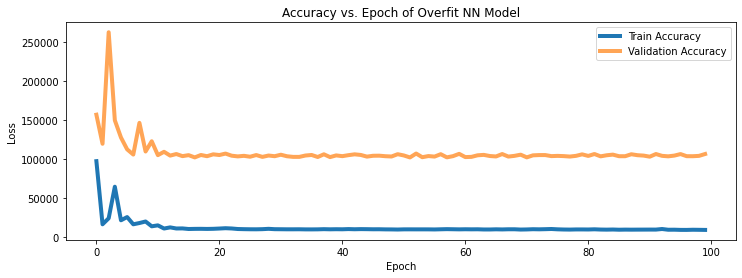

In [ ]:
plt.figure(figsize=[12,4])
plt.plot(fragmentation_model.history['loss'], label = 'Train Accuracy', linewidth=4)
plt.plot(fragmentation_model.history['val_loss'], label = 'Validation Accuracy', linewidth=4, alpha=.7)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Accuracy vs. Epoch of Overfit NN Model")
plt.legend()

In [ ]:
train_accuracy = fragmentation_overfit.evaluate(np.array(x_frag_train),np.array(y_frag_train), verbose = False)[1]
#test_accuracy = fragmentation_overfit.evaluate(np.array(x_frag_test),np.array(y_frag#_test), verbose = False)[1]

print("Train Accuracy: {:0.4f}".format(train_accuracy))
#print("Test Accuracy: {:0.4f}".format(test_accuracy))

Train Accuracy: 38807.6914


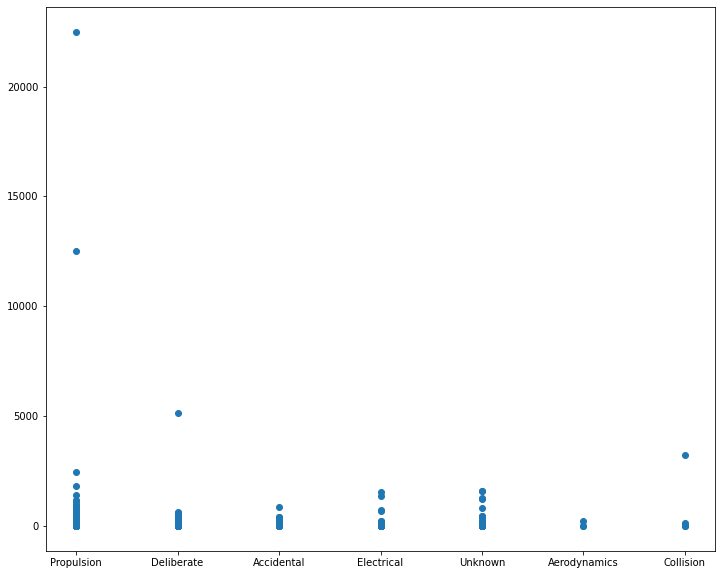

In [ ]:
# EDA

fig, ax = plt.subplots(figsize = (12,10))
plt.scatter(fragmentations_merged['Event Type'], fragmentations_merged['Objects > 10 cm'])


In [ ]:
# kernel_weight = 0.01
# bias_weight = 0.01
large_event_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (99,)),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dropout(0.7),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

# def create_model(learn_rate=0.01, drop_rate = 0.5):
#   model = tf.keras.models.Sequential([
#     tf.keras.layers.Input(shape = (99,)),
#     tf.keras.layers.Dense(100,activation='relu'),
#     tf.keras.layers.Dropout(drop_rate),
#     tf.keras.layers.Dense(100,activation='relu'),
#     tf.keras.layers.Dropout(drop_rate),
#     tf.keras.layers.Dense(100,activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')
#   ])
#   optimizer = tf.keras.optimizers.Adam(lr = learn_rate)
#   model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
	
#   return model

In [ ]:
# epochs = [20, 50, 100,150, 500, 1000]
# batch_size = [8, 16, 32, 64, 128]
# lr = [0.001, 0.01, 0.1, 1]
# dropout_rate = [0.2, 0.4, 0.6, 0.8]

# param_grid_nn_random = {
#     'epochs': epochs,
#     'batch_size': batch_size,
#     'drop_rate': dropout_rate,
#     'learn_rate': lr

# }


# model = KerasClassifier(build_fn=create_model, verbose=0)

In [ ]:
# grid = GridSearchCV(estimator=model, param_grid=param_grid_nn_random, n_jobs=-1, cv=3)
# grid_result = grid.fit(np.array(x_frag_train), np.array(y_frag_train_2))

In [ ]:

opt = tf.keras.optimizers.Adam(lr = 0.01)
large_event_model.compile(optimizer = 'adam', loss = "binary_crossentropy", metrics = ['accuracy'])

large_event_hist = large_event_model.fit(
    x = np.array(x_frag_train), y = np.array(y_frag_train_2), 
    epochs=50, batch_size=8, 
    validation_split = 0.3, 
    verbose = False
)

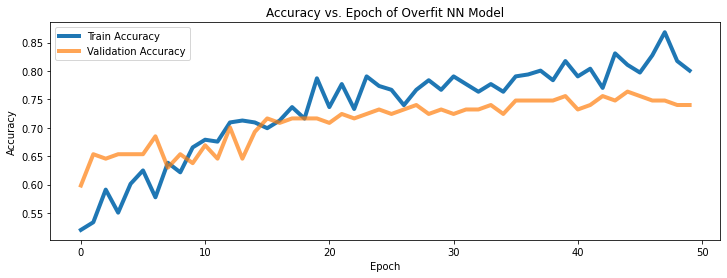

In [ ]:
plt.figure(figsize=[12,4])
plt.plot(large_event_hist.history['accuracy'], label = 'Train Accuracy', linewidth=4)
plt.plot(large_event_hist.history['val_accuracy'], label = 'Validation Accuracy', linewidth=4, alpha=.7)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy vs. Epoch of Overfit NN Model")
plt.legend()

In [ ]:
train_accuracy = large_event_model.evaluate(np.array(x_frag_train),np.array(y_frag_train_2), verbose = False)[1]
test_accuracy = large_event_model.evaluate(np.array(x_frag_test),np.array(y_frag_test_2), verbose = False)[1]
print("Train Accuracy: {:0.4f}".format(train_accuracy))
print("Test Accuracy: {:0.4f}".format(test_accuracy))



Train Accuracy: 0.8180
Test Accuracy: 0.7736


In [ ]:
y_pred_train = ((large_event_model.predict(np.array(x_frag_train)) > 0.5)*1.0)
logreg = LogisticRegression(C = 10, penalty = 'l2', max_iter = 20000).fit(x_frag_train, y_pred_train.ravel())
print("Logistic Regression Accuracy: {:0.4f}".format(logreg.score(x_frag_test, y_frag_test_2)))
 


Logistic Regression Accuracy: 0.7547


In [ ]:
importances = permutation_importance(logreg, x_frag_train, y_frag_train_2, n_jobs = -1)['importances_mean']

importances


array([ 0.00378251,  0.11300236,  0.01323877,  0.00567376,  0.12198582,
        0.00472813,  0.00047281,  0.00236407,  0.0572104 ,  0.00756501,
        0.0179669 ,  0.00236407,  0.        ,  0.00094563,  0.00614657,
        0.        ,  0.01702128,  0.00236407,  0.00189125,  0.        ,
        0.00047281,  0.        ,  0.        ,  0.        ,  0.        ,
        0.00236407,  0.00236407,  0.00567376,  0.00283688,  0.00283688,
        0.02458629,  0.09503546,  0.        ,  0.        ,  0.03073286,
        0.00236407,  0.        ,  0.00094563,  0.        ,  0.00047281,
       -0.00283688,  0.        ,  0.        , -0.00047281,  0.        ,
        0.00236407,  0.        ,  0.        ,  0.00283688,  0.00047281,
        0.00047281,  0.00283688,  0.00283688,  0.00283688,  0.00283688,
        0.        ,  0.        ,  0.        ,  0.00756501,  0.00047281,
        0.00047281,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.00047281,  0.        ,  0.00236407,  0.00

array([ 0.00378251,  0.11300236,  0.01323877,  0.00567376,  0.12198582,
        0.00472813,  0.00047281,  0.00236407,  0.0572104 ,  0.00756501,
        0.0179669 ,  0.00236407,  0.        ,  0.00094563,  0.00614657,
        0.        ,  0.01702128,  0.00236407,  0.00189125,  0.        ,
        0.00047281,  0.        ,  0.        ,  0.        ,  0.        ,
        0.00236407,  0.00236407,  0.00567376,  0.00283688,  0.00283688,
        0.02458629,  0.09503546,  0.        ,  0.        ,  0.03073286,
        0.00236407,  0.        ,  0.00094563,  0.        ,  0.00047281,
       -0.00283688,  0.        ,  0.        , -0.00047281,  0.        ,
        0.00236407,  0.        ,  0.        ,  0.00283688,  0.00047281,
        0.00047281,  0.00283688,  0.00283688,  0.00283688,  0.00283688,
        0.        ,  0.        ,  0.        ,  0.00756501,  0.00047281,
        0.00047281,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.00047281,  0.        ,  0.00236407,  0.00

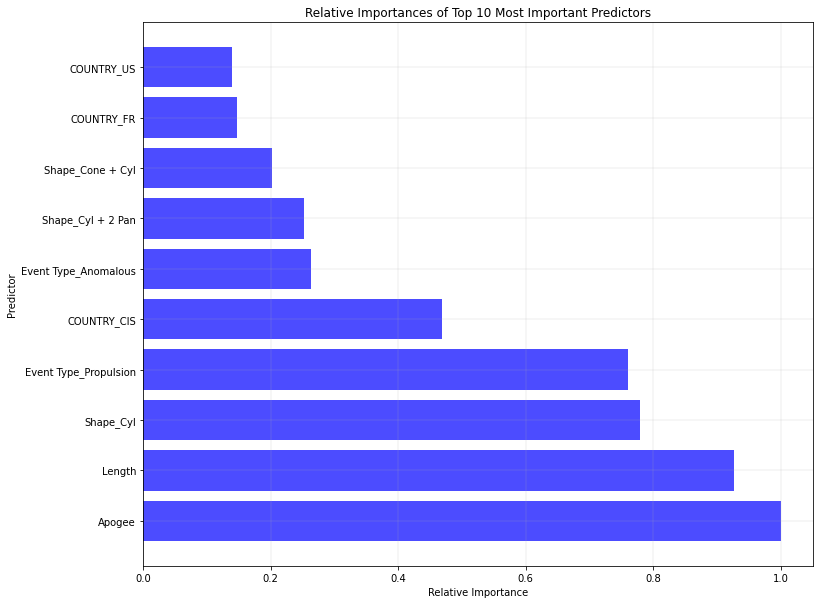

In [ ]:
columns = x_frag_train.columns
importance_df = pd.DataFrame(list(zip(importances, columns)), columns = ['importance', 'feature'])

importance_df['relative_importance'] = importance_df['importance']/importances.max()

top = importance_df.sort_values(by = 'importance', ascending = False).head(10)

fig, ax = plt.subplots(1, 1, figsize = (12,10))
ax.barh(top['feature'],top['relative_importance'], align='center',color="blue",alpha=0.7)
ax.grid(linewidth=0.2)
ax.set_ylabel("Predictor")
ax.set_xlabel("Relative Importance")
ax.set_title("Relative Importances of Top 10 Most Important Predictors")

plt.savefig('feature_importanc.png')

importances



In [ ]:
# let's try random forest

max_depth = 20
random_state = 111
n_estimators = 1500
random_forest = RandomForestClassifier(max_depth=max_depth, 
                    random_state=random_state, 
                    n_estimators=n_estimators)

# Fit the model on the training set
random_forest.fit(x_frag_train, y_frag_train_2)

RandomForestClassifier(max_depth=20, n_estimators=1500, random_state=111)

In [ ]:
predictions = random_forest.predict(x_frag_test)

# compute the accuracy on the validation set

acc_rf = round(accuracy_score(predictions, y_frag_test_2),2)

print(f'For Random Forest, the accuracy on the validation set is {acc_rf}')

For Random Forest, the accuracy on the validation set is 0.78


In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['log2', 'sqrt', 'auto']
max_depth = [int(x) for x in np.linspace(10, 110, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()


rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_frag_train, y_frag_train_2)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  4.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 21, 32, 43, 54, 65,
                                                      76, 87, 98, 110, None],
                                        'max_features': ['log2', 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [ ]:
best_params = rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 87,
 'bootstrap': True}

In [ ]:
param_grid_gs = {
    'bootstrap': [True],
    'max_depth': [ 20, 30,50,80,90, 100],
    'max_features': ['sqrt'],
    'min_samples_leaf': [2,3,4],
    'min_samples_split': [2, 3, 7, 10, 13],
    'n_estimators': [700, 900, 1000, 1100, 1500]
}

In [ ]:
# Create a based model
rf_2 = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_2, param_grid = param_grid_gs, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(x_frag_train, y_frag_train_2)

Fitting 3 folds for each of 450 candidates, totalling 1350 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   36.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed: 23.4min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [20, 30, 50, 80, 90, 100],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 7, 10, 13],
                         'n_estimators': [700, 900, 1000, 1100, 1500]},
             verbose=2)

In [ ]:
best_grid = grid_search.best_params_
best_grid


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 1000}

In [ ]:
best_model = RandomForestClassifier(max_depth = 80, max_features= 'sqrt',min_samples_split=10, n_estimators=1000, bootstrap=True).fit(x_frag_train, y_frag_train_2)

y_pred = best_model.predict(x_frag_test)

acc = accuracy_score(y_frag_test_2, y_pred)

acc

0.7264150943396226

In [ ]:
baseline = []
for i in range(len(y_frag_test_2)):
    baseline.append(0)

baseline_probability = y_frag_train_2[y_frag_train_2 == 1].shape[0]/y_frag_train_2.shape[0]
baseline_accuracy = accuracy_score(y_frag_test_2, baseline)

print("Fragmentation baseline probability: {:0.4f}".format(baseline_probability))
print("Fragmentation Baseline Accuracy: {:0.4f}".format(baseline_accuracy))

Fragmentation baseline probability: 0.4539
Fragmentation Baseline Accuracy: 0.6604
